In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Question 1

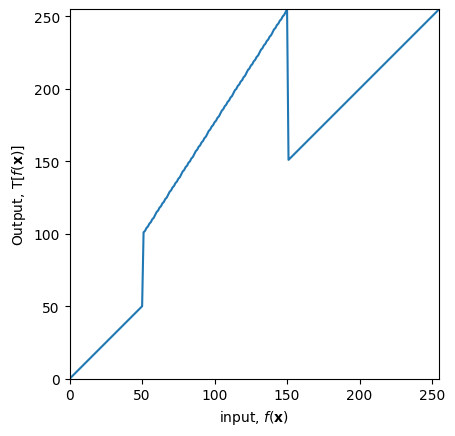

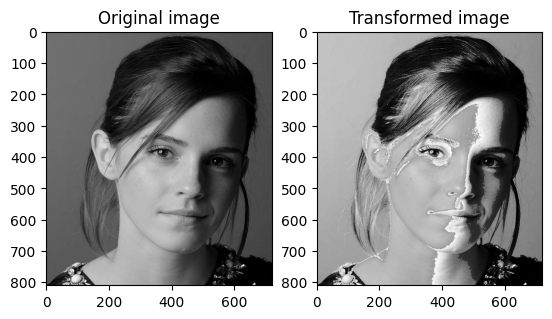

In [2]:
c = np.array([(50,50),(50,100),(150,255),(150,150),(255,255)])
t1 = np.linspace(0,c[0,1], c[0,0]+1).astype('uint8')
t2 = np.linspace(c[1,1]+1,c[2,1], c[2,0] - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1]+1,c[4,1], c[4,0]-c[3,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()



img_orig = cv.imread('emma.jpg', cv.IMREAD_GRAYSCALE)

image_transformed = cv.LUT(img_orig, transform)

# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img_orig)
# cv.waitKey(0)
# cv.imshow('Image', image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_orig, cmap = 'gray')
ax1.set_title('Original image')
ax2.imshow(image_transformed, cmap = 'gray')
ax2.set_title('Transformed image')
plt.show()


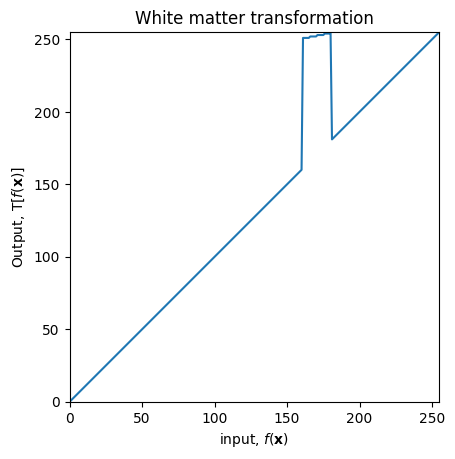

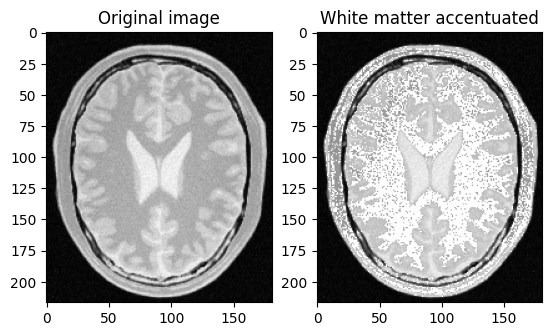

In [6]:
c = np.array([(0,0),(160,160),(160,250),(180,255),(180,180),(255,255)])
t1 = np.linspace(c[0,1],c[1,1], c[1,0]+1).astype('uint8')
t2 = np.linspace(c[2,1]+1,c[3,1], c[3,0] - c[2,0]).astype('uint8')
t3 = np.linspace(c[4,1]+1,c[5,1], c[5,0]-c[4,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title('White matter transformation')
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')

img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_orig, cmap = 'gray')
ax1.set_title('Original image')
ax2.imshow(image_transformed, cmap = 'gray')
ax2.set_title('White matter accentuated')
plt.show()


# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img_orig)
# cv.waitKey(0)
# cv.imshow('Image', image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

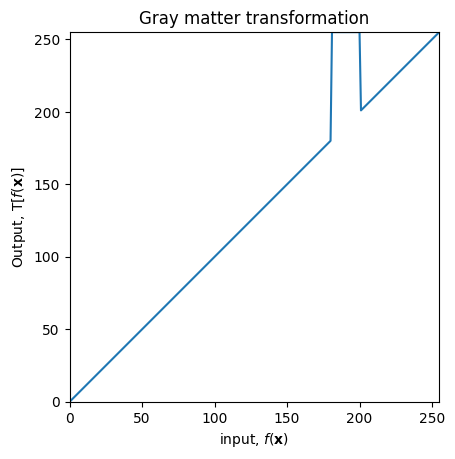

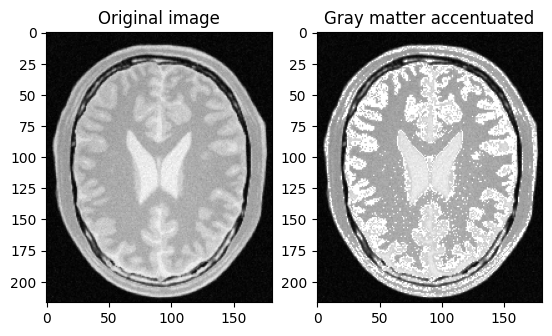

In [7]:
c = np.array([(0,0),(180,180),(180,254),(200,255),(200,200),(255,255)])
t1 = np.linspace(c[0,1],c[1,1], c[1,0]+1).astype('uint8')
t2 = np.linspace(c[2,1]+1,c[3,1], c[3,0] - c[2,0]).astype('uint8')
t3 = np.linspace(c[4,1]+1,c[5,1], c[5,0]-c[4,0] ).astype('uint8')

transform = np.concatenate((t1,t2)).astype('uint8')
transform = np.concatenate((transform,t3)).astype('uint8')

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_title('Gray matter transformation')
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()
img_orig = cv.imread('BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform)


fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_orig, cmap = 'gray')
ax1.set_title('Original image')
ax2.imshow(image_transformed, cmap = 'gray')
ax2.set_title('Gray matter accentuated')
plt.show()

# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img_orig)
# cv.waitKey(0)
# cv.imshow('Image', image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

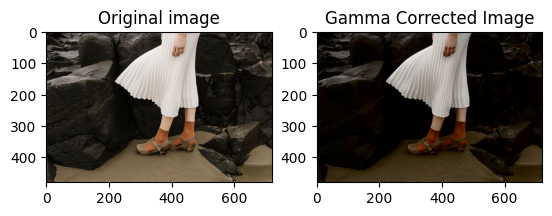

In [12]:
img_orig = cv.imread('highlights_and_shadows.jpg')
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_lab = cv.cvtColor(img_orig, cv.COLOR_RGB2LAB)
l, a, b = cv.split(img_lab)
gamma = 2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_gamma = cv.LUT(l,table)
img_gamma = cv.merge((img_gamma,a,b))
img_gamma = cv.cvtColor(img_gamma, cv.COLOR_LAB2RGB)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_orig)
ax1.set_title('Original image')
ax2.imshow(img_gamma)
ax2.set_title('Gamma Corrected Image')
plt.show()

# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img_orig)
# cv.waitKey(0)
# cv.imshow('Image', img_gamma)
# cv.waitKey(0)
# cv.destroyAllWindows()



In [14]:
def incr_vibr(x,a,sigma):
    f = x + (a*128 * np.e**(-(x-128)**2/(2*sigma**2)))
    return min(f,255)

print(incr_vibr(100,2000,1000))

255


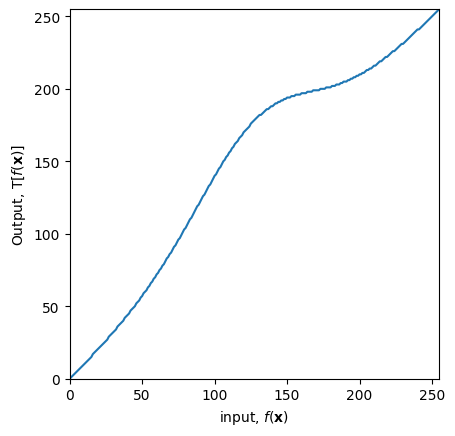

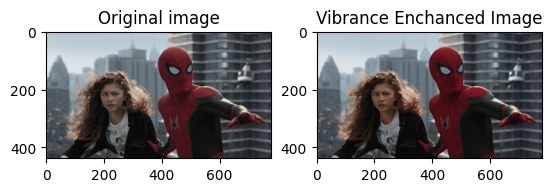

In [19]:
sigma = 40
a = 0.4
img_orig = cv.imread('spider.png')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
h, s, v =   cv.split(img_hsv)

for i in range(len(s)):
    for j in range(len(s[0])):
        s[i][j] = incr_vibr(s[i][j], a, sigma)

img_final = cv.merge((h,s,v))
img_final = cv.cvtColor(img_final, cv.COLOR_HSV2BGR)

t = np.linspace(0,255, 256).astype('uint8')
for val_index in range(len(t)):
    t[val_index] = incr_vibr(t[val_index], a, sigma)

img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_final = cv.cvtColor(img_final, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.plot(t)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img_orig)
ax1.set_title('Original image')
ax2.imshow(img_final)
ax2.set_title('Vibrance Enchanced Image')
plt.show()


# cv.imshow('Image', img_orig)
# cv.waitKey(0)
# cv.imshow('Image', img_final)
# cv.waitKey(0)
# cv.destroyAllWindows()



In [20]:
def hist_equal(img):
    '''insert grayscale image and it returns the transformed image and the 
    object transform(the function of the transformation used)'''
    image_transformed = img.copy()
    
    length = len(img[0])
    height = len(img)
    
    hist, bins = np.histogram(img.ravel(), 256, [0,256])

    transform = []
    cumsum = 0
    
    for val in range(len(hist)):
        cumsum+= hist[val]
        transform.append(np.round(cumsum/(length*height)*255))

    for i in range(height):
        for j in range(length):
            image_transformed[i][j] = transform[img[i][j]]

    transform = np.array(transform)
    
    return image_transformed, transform 


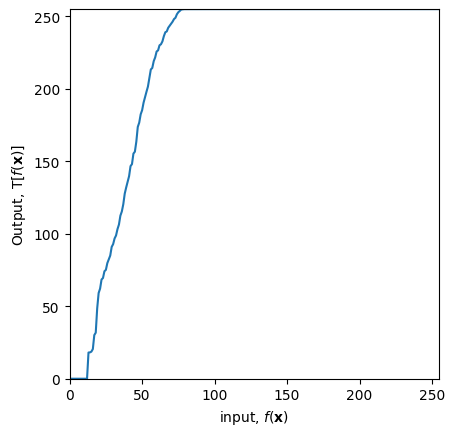

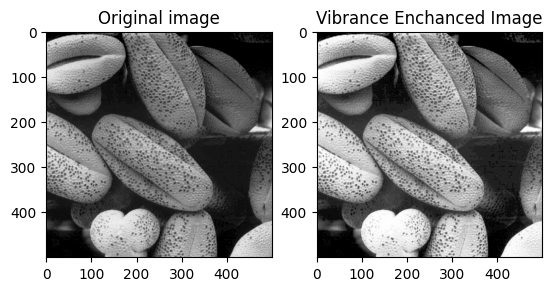

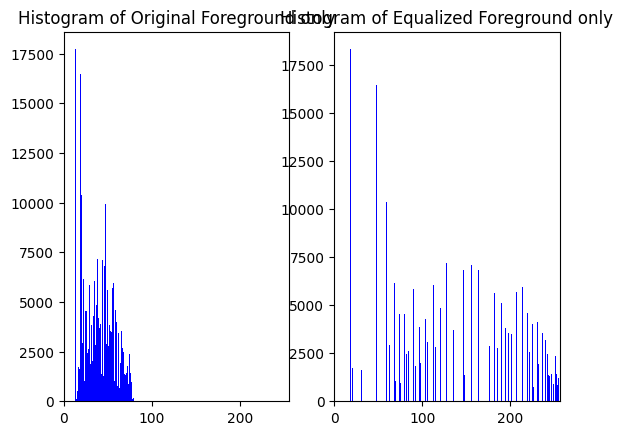

In [28]:
img = cv.imread('shells.tif', cv.IMREAD_GRAYSCALE)

image_transformed, transform = hist_equal(img)

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img, cmap = 'gray')
ax1.set_title('Original image')
ax2.imshow(image_transformed, cmap = 'gray')
ax2.set_title('Vibrance Enchanced Image')
plt.show()

fig, (ax1, ax2) = plt.subplots(1,2)


ax1.hist(img.flatten(), 256, [0,256] , color = 'b')
ax1.set_xlim([0,256])
ax1.set_title('Histogram of Original Foreground only')

ax2.hist(image_transformed.flatten(), 256, [0,256] , color = 'b')
ax2.set_xlim([0,256])
ax2.set_title('Histogram of Equalized Foreground only')


plt.show()


# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img)
# cv.waitKey(0)
# cv.imshow('Image', image_transformed)
# cv.waitKey(0)
# cv.destroyAllWindows()

In [23]:
img_orig = cv.imread('jeniffer.jpg')
img_hsv = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_gray = cv.cvtColor(img_orig, cv.COLOR_BGR2GRAY)
h, s, v = cv.split(img_hsv)
ret, mask = cv.threshold(s, 15, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
foreground = cv.bitwise_and(img_gray,img_gray, mask= mask)
background = cv.bitwise_and(img_gray,img_gray, mask= mask_inv)



# foreground_new = cv.cvtColor(foreground, cv.COLOR_BGR2RGB)
# r, g, b= cv.split(foreground_new)


def hist_equal(img):
    '''insert grayscale image and it returns the transformed image and the 
    object transform(the function of the transformation used)'''
    image_transformed = img.copy()
    
    length = img.shape[1]
    height = img.shape[0]
    
    total = np.count_nonzero(img)
    
    hist, bins = np.histogram(img.ravel(), 256, [0,256])

    transform = [0]
    cumsum = 0

    # for val in range(1,len(hist)):
    #     cumsum+= hist[val]
    #     transform.append(np.round(cumsum/(total)*255))
    
    transform = (hist.cumsum()-hist[0])/(total)*255

    for i in range(height):
        for j in range(length):
            image_transformed[i][j] = transform[img[i][j]]

    transform = np.array(transform)
    
    return image_transformed, transform 

    

# fortranformr, transformr= hist_equal(r)
# fortranformg, transformg = hist_equal(g)
# fortranformb, transformb = hist_equal(b)

# foreground_new = cv.merge((fortranformr, fortranformg, fortranformb ))
# foreground_new = cv.cvtColor(foreground_new, cv.COLOR_RGB2BGR)
foreground_new, transform = hist_equal(foreground)


final_img = cv.add(foreground_new,background)

# Naming a windowm
cv.namedWindow("Resized_Window", cv.WINDOW_NORMAL)

  
# Using resizeWindow()
cv.resizeWindow("Resized_Window", 2160, 3840)
# cv.imshow('Resized_Window', img_orig)
# cv.waitKey(0)
cv.imshow('Resized_Window', h)
cv.waitKey(0)
cv.imshow('Resized_Window', s)
cv.waitKey(0)
cv.imshow('Resized_Window', v)
cv.waitKey(0)
cv.imshow('Resized_Window', foreground)
cv.waitKey(0)
cv.imshow('Resized_Window', foreground_new)
cv.waitKey(0)
cv.imshow('Resized_Window', final_img)
cv.namedWindow("Original image", cv.WINDOW_NORMAL)
cv.resizeWindow("Original image", 2160, 3840)
cv.imshow('Original image',img_gray )
cv.waitKey(0)
cv.destroyAllWindows()

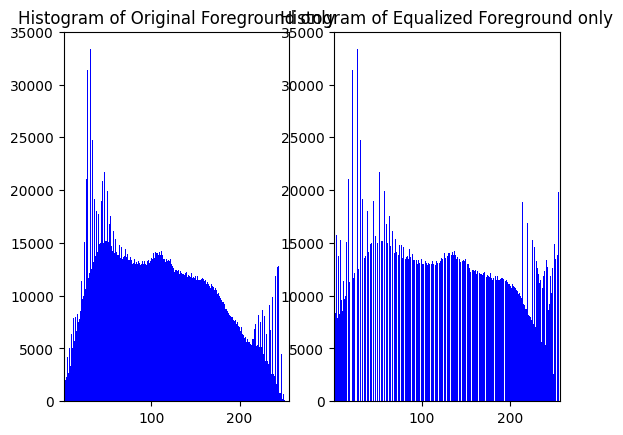

In [27]:
fig, (ax1, ax2) = plt.subplots(1,2)


ax1.hist(foreground.flatten(), 255, [ 1,256] , color = 'b')
ax1.set_xlim([1,256])
ax1.set_title('Histogram of Original Foreground only')

ax2.hist(foreground_new.flatten(), 255, [ 1,256] , color = 'b')
ax2.set_xlim([1,256])
ax2.set_title('Histogram of Equalized Foreground only')


plt.show()




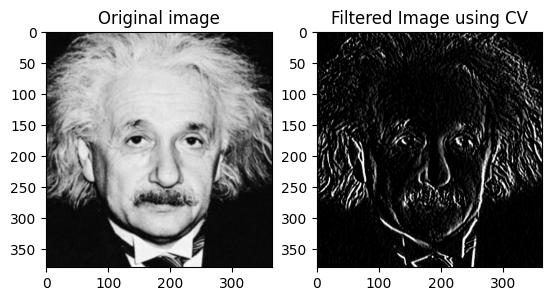

In [31]:
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

kernel = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype = 'float')
imgc = cv.filter2D(img, -1, kernel)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(imgc, cmap = 'gray')
ax2.set_title('Filtered Image using CV')
plt.show()

# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img)
# cv.waitKey(0)
# cv.imshow('Image', imgc)
# cv.waitKey(0)
# cv.destroyAllWindows()

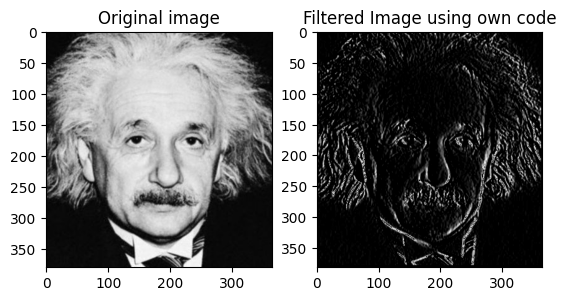

In [32]:
img_length = img.shape[1]
img_height = img.shape[0]
ker_length = kernel.shape[1]
ker_height = kernel.shape[0]

img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)
kernel = np.array([(1, 0, -1), (2, 0, -2), (1, 0, -1)], dtype = 'float')

def filter(image, kernel):
    img_length = image.shape[1]
    img_height = image.shape[0]
    ker_length = kernel.shape[1]
    ker_height = kernel.shape[0]
    #go to each relevant pixel
    #padding
    padded  = np.full((img_height+ker_height//2+1, img_length+ker_length//2+1), 0, dtype = 'uint8' )
    padded[1:img_height + 1, 1:img_length+1] = image
    
    
    im_float = cv.normalize(padded.astype('float'), None, 0.0, 1.0 , cv.NORM_MINMAX)

    imgb = np.zeros(im_float.shape,'float')

    for i in range(ker_length//2,img_length-ker_length//2):
        for j in range(ker_height//2,img_height-ker_height//2):
                imgb[j][i] = np.dot(im_float[j-ker_height//2:j+ker_height//2+1, i-ker_length//2:i+ker_length//2+1].flatten(),kernel.flatten())
                if imgb[j][i]<0:
                    imgb[j][i] = 0
    imgb = imgb*255
    imgb = imgb.astype(np.uint8)
    
    return imgb

filtered_img = filter(img, kernel)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(filtered_img, cmap = 'gray')
ax2.set_title('Filtered Image using own code')
plt.show()
# cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
# cv.imshow('Image', img)
# cv.waitKey(0)
# cv.imshow('Image', filtered_img)
# cv.waitKey(0)
# cv.destroyAllWindows()


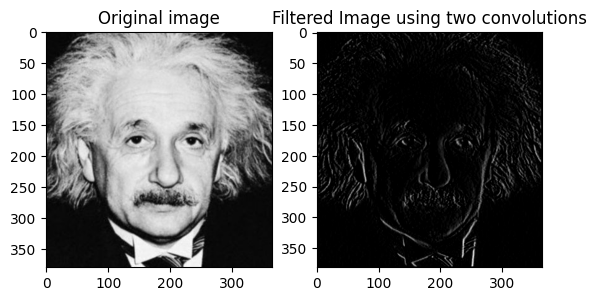

In [36]:
kernel1 = np.array([[1], [2],[1]], dtype = 'float')
kernel2 = np.array([(1,0,-1)], dtype = 'float')

filtered1 = filter(img,kernel1)
filtered2 = filter(img,kernel2)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(img, cmap='gray')
ax1.set_title('Original image')
ax2.imshow(filtered2, cmap = 'gray')
ax2.set_title('Filtered Image using two convolutions')
plt.show()

# cv.imshow('Image', img)
# cv.waitKey(0)
# cv.imshow('filtered1', filtered1)
# cv.waitKey(0)
# cv.imshow('filtered2', filtered2)
# cv.waitKey(0)
# cv.destroyAllWindows()


In [42]:
import time 

img = cv.imread('flower.png')
mask = np.zeros(img.shape[:2], dtype = 'uint8')
rect = (27, 85,350,300)

# define the bounding box coordinates that approximately define my
# face and neck region (i.e., all visible skin)
# rect = (151, 43, 236, 368)

# allocate memory for two arrays that the GrabCut algorithm internally
# uses when segmenting the foreground from the background
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
# apply GrabCut using the the bounding box segmentation method
start = time.time()
(mask, bgModel, fgModel) = cv.grabCut(img, mask, rect, bgModel,
	fgModel, iterCount=2, mode=cv.GC_INIT_WITH_RECT)
end = time.time()
print("[INFO] applying GrabCut took {:.2f} seconds".format(end - start))

# in the mask as (1) definite background, (2) definite foreground,
# (3) probable background, and (4) probable foreground
values = (
	("Definite Background", cv.GC_BGD),
	("Probable Background", cv.GC_PR_BGD),
	("Definite Foreground", cv.GC_FGD),
	("Probable Foreground", cv.GC_PR_FGD),
)
# loop over the possible GrabCut mask values
for (name, value) in values:
	# construct a mask that for the current value
	print("[INFO] showing mask for '{}'".format(name))
	valueMask = (mask == value).astype("uint8") * 255
	# display the mask so we can visualize it
	cv.imshow(name, valueMask)
	cv.waitKey(0)
cv.destroyAllWindows()

[INFO] applying GrabCut took 0.36 seconds
[INFO] showing mask for 'Definite Background'
[INFO] showing mask for 'Probable Background'
[INFO] showing mask for 'Definite Foreground'
[INFO] showing mask for 'Probable Foreground'


In [43]:
# we'll set all definite background and probable background pixels
# to 0 while definite foreground and probable foreground pixels are
# set to 1
outputMask = np.where((mask == cv.GC_BGD) | (mask == cv.GC_PR_BGD),
	0, 1)
# scale the mask from the range [0, 1] to [0, 255]
outputMask = (outputMask * 255).astype("uint8")
outputMask_inv = cv.bitwise_not(outputMask)
background =  cv.bitwise_and(img, img, mask=outputMask_inv)
background = cv.GaussianBlur(background,(25,25),0)
output = cv.bitwise_and(img, img, mask=outputMask)
output_img = cv.add(output,background)
# apply a bitwise AND to the image using our mask generated by
# GrabCut to generate our final output image


# show the input image followed by the mask and output generated by
# GrabCut and bitwise masking
cv.imshow("Input", img)
cv.imshow("GrabCut Mask", outputMask)
cv.imshow("GrabCut Output", output)
cv.imshow("Final Output", output_img)
cv.waitKey(0)
cv.destroyAllWindows()

In [44]:
import numpy as np
import cv2 as cv
from scipy.ndimage import interpolation

# Load the original image array
img = cv.imread("zooming\im01small.png")


# Obtaining the Dimensions of the image
height, width = img.shape[:2]
  
# Downscaling the image
height = int(height*2)
width = int(width*2)
  
# Performing the resize operation with Nearest neighbor interpolation
res = cv.resize(img, (width, height), interpolation = cv.INTER_NEAREST)
  
# Displaying the image
cv.imshow('img', res)
cv.waitKey(0)
cv.destroyAllWindows()

In [45]:
def calculate_accuracy(img1, img2):
    assert img1.shape == img2.shape, "incompatible sizes"
    ssd = np.sum(((img1[:,:]-img2[:,:])**2)/(3*255*2))/(img1.shape[0]*img2.shape[1])
    return ssd

In [ ]:
def zoom_nearest_neighbor(input_image, scale_factor):
    # Open the input image
    
    # Get the dimensions of the input image
    height, width, channels = input_image.shape
    
    # Calculate the new dimensions after zooming
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Create an output image with the new dimensions
    output_image = np.zeros((new_height, new_width,3),dtype='uint8')
    
    # Iterate through each pixel in the output image and map it to the nearest pixel in the input image
    for x in range(new_width):
        for y in range(new_height):
            source_x = int(x / scale_factor)
            source_y = int(y / scale_factor)
            # print(output_image[y][x])
            # print(input_image[source_y][ source_x])
            output_image[y][x]= input_image[source_y][ source_x]
            # print(x,y,source_x,source_y)
    
    # # Save the zoomed image
    # output_image.save(output_image_path)
    
    return output_image

In [75]:
def interpolate_bilinear(image, x, y):
    height,width,channels = image.shape
    x1, y1 = int(x), int(y)
    x2, y2 = x1 + 1, y1 + 1

    if x2 >= width:
        x2 = x1
    if y2 >= height:
        y2 = y1

    pixel1 = image[y1][x1]
    pixel2 = image[y1][x2]
    pixel3 = image[y2][x1]
    pixel4 = image[y2][x2]

    fraction_x = x - x1
    fraction_y = y - y1

    interpolated_pixel = np.array((
        int((1 - fraction_x) * (1 - fraction_y) * pixel1[0] + fraction_x * (1 - fraction_y) * pixel2[0] +
            (1 - fraction_x) * fraction_y * pixel3[0] + fraction_x * fraction_y * pixel4[0]),
        int((1 - fraction_x) * (1 - fraction_y) * pixel1[1] + fraction_x * (1 - fraction_y) * pixel2[1] +
            (1 - fraction_x) * fraction_y * pixel3[1] + fraction_x * fraction_y * pixel4[1]),
        int((1 - fraction_x) * (1 - fraction_y) * pixel1[2] + fraction_x * (1 - fraction_y) * pixel2[2] +
            (1 - fraction_x) * fraction_y * pixel3[2] + fraction_x * fraction_y * pixel4[2])
    ))

    return interpolated_pixel

def zoom_bilinear(input_image, scale_factor):
    # Open the input image
    
    # Get the dimensions of the input image
    height, width, channels = input_image.shape
    
    # Calculate the new dimensions after zooming
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)
    
    # Create an output image with the new dimensions
    output_image = np.zeros((new_height, new_width,3),dtype='uint8')

    for y in range(new_height):
        for x in range(new_width):
            source_x = x / scale_factor
            source_y = y / scale_factor
            interpolated_pixel = interpolate_bilinear(input_image, source_x, source_y)
            output_image[y][x] = interpolated_pixel

    return output_image

0.16473307197107212
0.16909701419147904


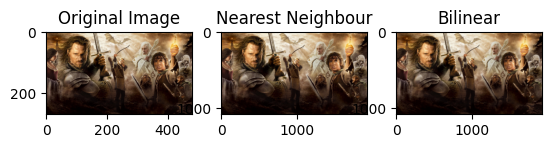

In [77]:


scale_factor = 4.0

fig, axes = plt.subplots(1,3)



# # Replace these paths with your actual input and output image paths
img1 = cv.imread("zooming/im01small.png")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput1 = zoom_nearest_neighbor(img1, scale_factor)
bioutput1 = zoom_bilinear(img1, scale_factor)
accurate1 = cv.imread("zooming/im01.png")
axes[0].imshow(img1)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput1)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput1)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate1, nnoutput1))
print(calculate_accuracy(accurate1, bioutput1))

plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img2 = cv.imread("zooming/im02small.png")
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
bioutput2 = zoom_bilinear(img2, scale_factor)
nnoutput2 = zoom_nearest_neighbor(img2, scale_factor)
accurate2 = cv.imread("zooming/im02.png")
axes[0].imshow(img2)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput2)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput2)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate2, nnoutput2))
print(calculate_accuracy(accurate2, bioutput2))
plt.show()



fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img3 = cv.imread("zooming/im03small.png")
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
bioutput3 = zoom_bilinear(img3, scale_factor)
nnoutput3 = zoom_nearest_neighbor(img3, scale_factor)
accurate3 = cv.imread("zooming/im03.png")
axes[0].imshow(img3)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput3)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput3)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate3, nnoutput2))
print(calculate_accuracy(accurate3, bioutput2))
plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img4 = cv.imread("zooming/im04small.png")
img4 = cv.cvtColor(img4, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput4 = zoom_nearest_neighbor(img4, scale_factor)
bioutput4 = zoom_bilinear(img4, scale_factor)
accurate4 = cv.imread("zooming/im04.png")
axes[0].imshow(img4)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput4)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput4)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate4, nnoutput4))
print(calculate_accuracy(accurate4, bioutput4))

plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img5 = cv.imread("zooming/im05small.png")
img5 = cv.cvtColor(img5, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput5 = zoom_nearest_neighbor(img5, scale_factor)
bioutput5 = zoom_bilinear(img5, scale_factor)
accurate5 = cv.imread("zooming/im05.png")
axes[0].imshow(img5)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput5)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput5)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate5, nnoutput5))
print(calculate_accuracy(accurate5, bioutput5))


plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img6 = cv.imread("zooming/im06small.png")
img6 = cv.cvtColor(img6, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput6 = zoom_nearest_neighbor(img6, scale_factor)
bioutput6 = zoom_bilinear(img6, scale_factor)
accurate6 = cv.imread("zooming/im06.png")
axes[0].imshow(img6)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput6)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput6)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate6, nnoutput6))
print(calculate_accuracy(accurate6, bioutput6))


plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img7 = cv.imread("zooming/im07small.png")
img7 = cv.cvtColor(img7, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput7 = zoom_nearest_neighbor(img7, scale_factor)
bioutput7 = zoom_bilinear(img7, scale_factor)
accurate7 = cv.imread("zooming/im07.png")
axes[0].imshow(img7)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput7)
axes[1].set_title('Nearest Neighbour')
axes[1].imshow(bioutput7)
axes[1].set_title('Bilinear')
print(calculate_accuracy(accurate7, nnoutput7))
print(calculate_accuracy(accurate7, bioutput7))

plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img8 = cv.imread("zooming/im08small.png")
img8 = cv.cvtColor(img8, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput8 = zoom_nearest_neighbor(img8, scale_factor)
bioutput8 = zoom_bilinear(img8, scale_factor)
accurate8 = cv.imread("zooming/im08.png")
axes[0].imshow(img8)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput8)
axes[1].set_title('Nearest Neighbour')
axes[1].imshow(bioutput8)
axes[1].set_title('Bilinear')
# print(calculate_accuracy(accurate8, output8))

plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img9 = cv.imread("zooming/im09small.png")
img9 = cv.cvtColor(img9, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
nnoutput9 = zoom_nearest_neighbor(img9, scale_factor)
bioutput8 = zoom_bilinear(img9, scale_factor)
accurate9 = cv.imread("zooming/im09.png")
axes[0].imshow(img9)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput9)
axes[1].set_title('Nearest Neighbour')
axes[2].imshow(bioutput9)
axes[2].set_title('Bilinear')
print(calculate_accuracy(accurate9, nnoutput9))
print(calculate_accuracy(accurate9, bioutput9))


plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img10 = cv.imread("zooming/im10small.png")
img10 = cv.cvtColor(img10, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
output10 = zoom_nearest_neighbor(img10, scale_factor)
bioutput10 = zoom_bilinear(img10, scale_factor)
accurate10 = cv.imread("zooming/im10.png")
axes[0].imshow(img10)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput10)
axes[1].set_title('Nearest Neighbour')
axes[1].imshow(bioutput10)
axes[1].set_title('Bilinear')
# print(calculate_accuracy(accurate10, output10))

plt.show()

fig, axes = plt.subplots(1,3)

# Replace these paths with your actual input and output image paths
img11 = cv.imread("zooming/im11small.png")
img11 = cv.cvtColor(img11, cv.COLOR_BGR2RGB)
# Scale factor for zooming (e.g., 2.0 for doubling the size)
output11 = zoom_nearest_neighbor(img11, scale_factor)
bioutput11 = zoom_bilinear(img11, scale_factor)
accurate11 = cv.imread("zooming/im11.png")
axes[0].imshow(img11)
axes[0].set_title('Original Image')
axes[1].imshow(nnoutput11)
axes[1].set_title('Nearest Neighbour')
axes[1].imshow(bioutput11)
axes[1].set_title('Bilinear')
# print(calculate_accuracy(accurate11, output11))

plt.show()




# cv.imshow('original', img)
# cv.imshow('img', output_image)
# cv.waitKey(0)
# cv.destroyAllWindows()

99.96780884987358
